# Plotting

## One-dimensional data (e.g. time series, vertical profiles,...)

```julia
using PyPlot
plot(x,y,format)
```

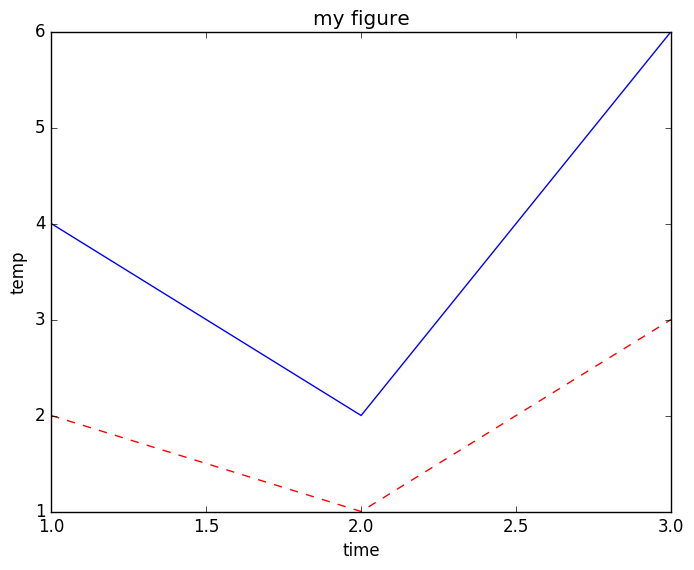

In [2]:
using PyPlot
clf() # clear figure
x = [1,2,3]
y = [2,1,3]
using PyPlot
plot(x,y,"r--")
plot(x,2*y,"b-")
title("my figure")
xlabel("time")
ylabel("temp");

* Draws a line with the values in x and in y as x- (horizontal) and y-axis (vertical) respectively. With format one can specify the color (blue ("b"), red ("r"), green ("g"), ...) and style of the line (solid (-), dots (.), dotted (:), ...)

Download these data (sea level time series in the West Florida Shelf, in the 6th column) and make a plot, with a solid line in green. The date can be derived from the 5 first columns, using the command datenum. Include labels with the variable units (meters) and the date, and add a legend.

At which date did the sea level reach its maximum? 

## Two-dimensional data (e.g. horizontal sections, ...)


```julia
pcolor(x,y,v)
```

* The value within a rectangle defined by x and y is drawn by color depending on v and on the color map. 

* show the color bar

```julia
colorbar()
```

* show color bar relating values and colors

* Missing values are unfortunatetly not directly handeld by `PyPlot'.

## Annotating your graphs


* give a title to the current figure

```julia
title("my figure")
```

* give a name to the x- and y-axis

```julia
xlabel("my label"), ylabel("my label")
```

* Save the figure as a PNG file. For a EPS file use the file extension. Do not save images in JPEG as it degrades the quality of the figure.

```julia
savefig("file.png")
```